# 로지스틱 회귀

둘 중 하나를 결정하는 문제를 이진 분류(스팸 메일 분류 등)라고 하고 이진 분류의 대표적인 알고리즘으로 로지스틱 회귀가 있다.

- 로지스틱 회귀의 이름이 회귀이지만 실제로는 분류 문제에 사용한다.

## 이진 분류

0과 1로 표현되는 데이터는 계단 모양의 그래프로 표현된다. 직선 함수는 이러한 그래프를 설명할 수 없다. 따라서 특정 함수를 추가하여 이 그래프를 설명할 수 있다. 시그모이드가 바로 이러한 특정 함수이다.

## 시그모이드 함수

$$H(x) = sigmoid(Wx + b) = \frac{1}{1 + e^{-(Wx + b)}} = σ(Wx + b)$$

위처럼 기존의 선형 함수식인 $Wx + b$에 시그모이드 함수를 추가하여 이진 분류를 설명할 수 있다. 다음은 기울기 $W$와 편향$b$가 시그모이드 그래프에 미치는 영향을 시각화하였다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

- $W=1, b=0$인 그래프

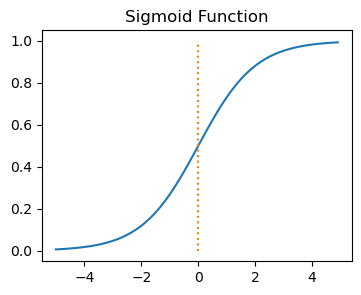

In [9]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)

plt.figure(figsize=(4, 3))
plt.plot(x, y)
plt.plot([0, 0], [0, 1], ":")
plt.title("Sigmoid Function")
plt.show()

위의 그래프처럼 시그모이드 함수는 0과 1사이의 값으로 반환된다.

- $W$의 변화에 따른 그래프

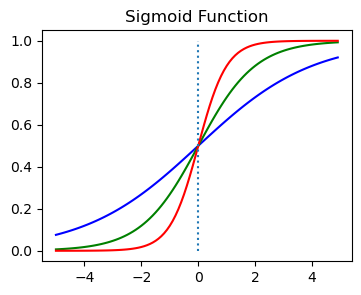

In [14]:
x = np.arange(-5, 5, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.figure(figsize=(4, 3))
plt.plot(x, y1, 'b')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'r')
plt.plot([0, 0], [0, 1], ":")
plt.title("Sigmoid Function")
plt.show()

기울기 W값이 커질수록 경사가 더욱 가파르게 변한다.

- $b$값의 변화에 따른 그래프

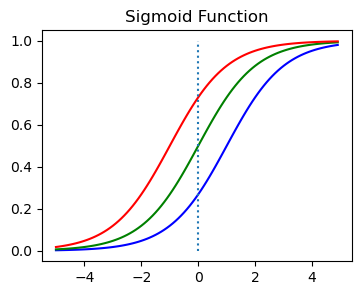

In [15]:
x = np.arange(-5, 5, 0.1)
y1 = sigmoid(x-1)
y2 = sigmoid(x)
y3 = sigmoid(x+1)

plt.figure(figsize=(4, 3))
plt.plot(x, y1, 'b')
plt.plot(x, y2, 'g')
plt.plot(x, y3, 'r')
plt.plot([0, 0], [0, 1], ":")
plt.title("Sigmoid Function")
plt.show()

편향 b값이 커질수록 그래프가 왼쪽으로 이동한다.

## 시그모이드 함수를 이용한 분류

시그모이드 함수는 0과 1사이의 값을 가진다. 따라서 이 사이의 값을 임계값으로 설정하여 임계값보다 큰 경우와 작은 경우로 나누어서 분류를 수행할 수 있다.

# 비용 함수

로지스틱 회귀는 $H(x) = sigmoid(Wx+b)$로 표현된다. 최적의 W와 b를 찾는 비용 함수를 미분하면 다음과 같은 그래프가 나온다.

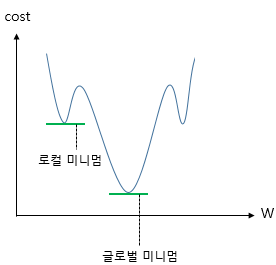

위와 같은 그래프에 경사 하강법을 사용하면 세 개의 점에서 수렴하게 된다. 이는 완전한 최적값이 아닐 수도 있다.

시그모이드 함수의 특징은 함수의 출력값이 0과 1사이라는 것이다. 따라서 실제값이 1이고 예측값이 0에 가까워지면 오차가 커져야한다. 이를 충족하는 함수에 로그 함수가 있다.